# Cursul 6

## Modele neliniare 

Modelele prezentate pînă acum modelează evoluția unei singure specii, chiar dacă le-am separat după diferite categorii, mai ales de vîrstă. Este foarte important să modelăm evoluția speciilor ținînd cont de interacțiunile între ele: unele specii sînt prădători pentru alte specii și sînt pradă pentru altele. De asemenea unele specii concurează pentru resurse astfel că dacă una crește, celelalte au de suferit. Există și exemple de simbioză și alte interacțiuni mutual avantajoase.

Cel mai simplu exemplu este unul a două specii care se au un singur tip de interacțiune. Vom studia aceleași probleme ca și în cazul sistemelor liniare: populațiile vor crește, vor scădea, vor apărea comportări oscilante, se va atinge o stare de echilibru etc. ? În continuare vom modela două specii dintre care una se hrănește cu cealaltă.

### Sisteme pradă-prădător

Să presupunem că una dintre specii este sursa unică de hrană pentru cealaltă și că acesta este singurul factor care determină mărimea populației. De exemplu putem  considera un grup de vulpi și iepuri izolați pe o insulă, vulpile fiind singurul factor care limitează creșterea nelimitată a populației de iepuri. 

Fie $P_t$ populația de populație pradă și $Q_t$ numărul de prădători. Avem sistemul $$\begin{aligned}\Delta P & = F(P,Q) \\ \Delta Q & = G(P,Q).\end{aligned}$$ și trebuie să determinăm funcțiile $F$ și $G$. Pentru început să presupunem cum vor evolua populațiile singure (în absența celorlalte). Este rezonabil să presupunem că prada va evolua după un model logistic în absența prădătorilor: $$\Delta P =rP\left(1-\frac{P}{K}\right).$$ Pentru prădători putem presupune că în absența prăzii populația acestora se va stinge $$\Delta Q = -u Q$$ cu $u$ o constantă pozitivă mai mică decît $1$ (reprezintă mortalitatea). Acum introducem interacțiunea. Pentru aceasta vom adăuga un termen care conține termenul $PQ$. Dacă $P$ și $Q$ sînt mici, atunci și produsul este mic, deci vor fi puține interacțiuni, dacă ambele populații sînt mari, atunci produsul va fi și el mare și deci vor fi multe interacțiuni, dacă una dintre populații va fi mare și alta mică, atunci produdul va fi de mărime medie. Modelul va fi acum $$\begin{aligned} \Delta P & =rP\left(1-\frac{P}{K}\right)-sPQ \\ \Delta Q & = -u Q+vPQ.\end{aligned}$$ Constantele $s$ și $v$ sînt pozitive. Termenul $-sPQ$ măsoară efectul negativ al interacțiilor pentru pradă, iar $vPQ$ măsoară efectul pozitiv pentru prădător. Rescriem modelul în termeni de populație, nu de variație $$\begin{aligned}P_{t+1} & = P_t\left(1+r\left(1-\frac{P_t}{K}\right)\right)-sP_tQ_t \\ Q_{t+1} & = (1-u)Q_t+vP_tQ_t.\end{aligned}$$ Constantele $s,r,K,u,v$ sînt pozitive și $u<1$. Valorile parametrilor se determină prin observații și estimări. 

**Exemplu:** Să luăm valorile parametrilor $K=1,r=1,3, s=0,5, u=0,7$ și $v=1,6$. Modelul este $$\begin{aligned}P_{t+1} & = P_t\left(1+1,3\left(1-P_t\right)\right)-0,5P_tQ_t \\ Q_{t+1} & = 0,3Q_t+1,6P_tQ_t.\end{aligned}$$

Dacă calculăm valorile și le punem într-un tabel obținem.

In [15]:
using PrettyTables,IJulia 
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
vals=[(P,Q)]
for t in 1:tstop
    P1=P*(1+1.3*(1-P))-0.5*P*Q
    Q1=0.3*Q+1.6*P*Q
    append!(vals,[(P1,Q1)])
    P=P1
    Q=Q1
end
df=hcat(collect(0:tstop),[vals[i][1] for i in 1:length(vals)],[vals[i][2] for i in 1:length(vals)])
conf=set_pt_conf(tf = tf_markdown, alignment = :c);
header=["Timp", "P","Q"];
pretty_table_with_conf(conf,df;header=header)

P0=  1.3
Q0=  0.5
Timpul final =  200


| Timp  |    P     |    Q    |
|-------|----------|---------|
|  0.0  |   1.3    |   0.5   |
|  1.0  |  0.468   |  1.19   |
|  2.0  | 0.513209 | 1.24807 |
|  3.0  | 0.517721 | 1.39926 |
|  4.0  | 0.480101 | 1.57886 |
|  5.0  | 0.425581 | 1.68647 |
|  6.0  | 0.384516 | 1.65431 |
|  7.0  | 0.374124 | 1.51407 |
|  8.0  | 0.395301 | 1.36054 |
|  9.0  | 0.43714  | 1.26868 |
| 10.0  | 0.479708 | 1.26795 |
| 11.0  | 0.500051 | 1.35357 |
| 12.0  | 0.486623 | 1.48904 |
| 13.0  | 0.449089 | 1.60608 |
| 14.0  | 0.410084 | 1.63586 |
| 15.0  | 0.389154 | 1.5641  |
| 16.0  | 0.393844 | 1.44311 |
| 17.0  | 0.420013 | 1.34231 |
| 18.0  | 0.454802 | 1.30475 |
| 19.0  | 0.480444 | 1.34087 |
| 20.0  | 0.482839 | 1.43301 |
| 21.0  | 0.461501 | 1.53696 |
| 22.0  | 0.42992  | 1.59598 |
| 23.0  | 0.405463 | 1.57662 |
| 24.0  | 0.399213 | 1.49581 |
| 25.0  | 0.412435 | 1.40418 |
| 26.0  | 0.437901 | 1.34786 |
| 27.0  | 0.462773 | 1.34873 |
| 28.0  | 0.473894 | 1.40327 |
| 29.0  | 0.465508 | 1.48498 |
| 30.0  

Sau grafic

P0=  0.7
Q0=  1.5
Timpul final =  200


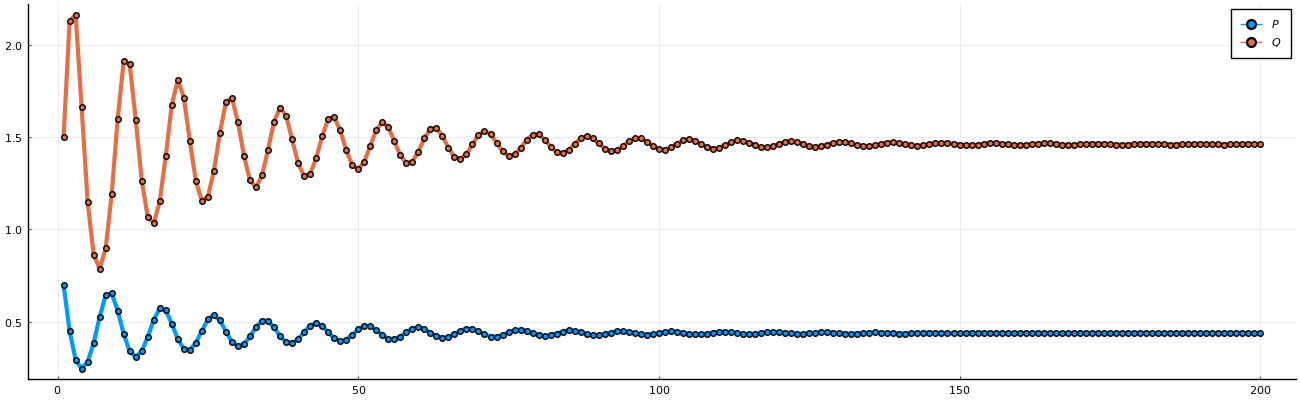

In [8]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=P*(1+1.3*(1-P))-0.5*P*Q
    Q1=0.3*Q+1.6*P*Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,label=L"P",linewidth=3,markershape = :circle,size=(1300,400))
plot!(Qs,label=L"Q",linewidth=3, markershape = :circle,size=(1300,400))

Din ambele reprezentări vedem că pentru majoritatea valorilor inițiale sistemul se stabilizează spre valorile $(P^*,Q^*) \approx (0,4,1,4).$ Vom folosi în continuare o reprezentare grafică nouă **în spațiul fazelor**, adică vom considera $P_t$ pe axa $Ox$ și $Q_t$ pe axa $Oy$.

P0=  1.3
Q0=  0.2
Timpul final =  200


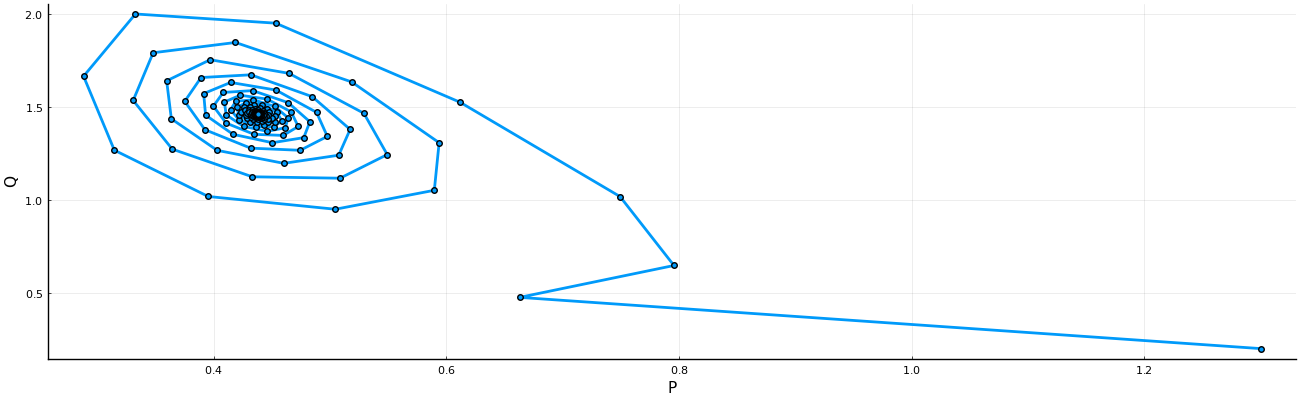

In [16]:
using LinearAlgebra
using Plots
using LaTeXStrings, IJulia
P = IJulia.readprompt("P0= ")
P = parse(Float64, P)
Q = IJulia.readprompt("Q0= ")
Q = parse(Float64, Q)
tstop = IJulia.readprompt("Timpul final = ")
tstop = parse(Int64,tstop)
Ps=[]
Qs=[]
for t in 1:tstop
    P1=P*(1+1.3*(1-P))-0.5*P*Q
    Q1=0.3*Q+1.6*P*Q
    push!(Ps,P)
    push!(Qs,Q)
    P=P1
    Q=Q1
end
pyplot()
plot(Ps,Qs,linewidth=2,markershape = :circle,size=(1300,400),label="")
xaxis!("P")
yaxis!("Q")

Seria de puncte $(P_0,Q_0),(P_1,Q_1),\dots$ se numește **orbita** valorii inițiale $(P_0,Q_0)$. Modelul nostru pare că pentru majoritatea valorilor inițiale mărimea populațiilor oscilează în jurul unei valori de echilibru. Se poate ca sistemul să aibă o comportare periodică pe termen lung. Empiric se observă că o 
populație mare de predători produce un declin al prăzii, urmată de un declin al prădători. În natură avem fie stabilizarea la o valoare de echilibru, fie dispariția uneia dintre populații. În condiții de laborator s-au obținut astfel de comportamente oscilante. Pentru a obține astfel de comportare trebuie să potrivim cu grijă parametrii sistemului. Un astfel de sistem se numește **structural instabilă**.

**Definiție** Pentru un model cu două populații $$\begin{aligned}P_{t+1}&=F(P_t,Q_t) \\ Q_{t+1}&=G(P_t,Q_t)\end{aligned}$$ o valoare $(P^*,Q^*)$ pentru care $F(P^*,Q^*)=P^*$ și $G(P^*,Q^*)=Q^*$. 

Dacă valorile populațiilor se află la echilbru, atunci valorile acestora nu se schimbă în timp. 

Practic dacă vrem să determinăm echilibrul trebuie să rezolvăm ecuațiile $$\left\{\begin{array}{ccc} P^* & = & F(P^*,Q^*) \\ Q^* & = & G(P^*,Q^*)
\end{array}\right.$$